## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli 1 , Augusto Borges 1, 2, 3 & Osvaldo Chara 1,4
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 2 from the paper.
#### Run the following cell to plot fig 2 from the paper and to save it as a png image.
##### Expected computational time: 1 minute.

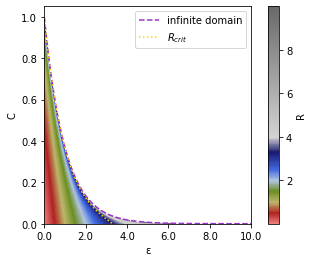

My program took 67.95259118080139 seconds to run


In [18]:
# This cell plots fig 2. It is a heatmap for different tissue lengths (R) that plots the concentration in time and 
# space. The solution for an infinite tissue and for R=Rcrit are added as dotted lines.

# Import libraries.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Function definition.

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This function calculates the morphogen concentration in a finite tissue at the steady state using the analytic 
# solution presented in this work.
def ss_finite(x,R):
    if x <= R:
        return (np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    else:
        return -1

# Defines arrays that are going to be used later.
steps = 1000
rrange = np.arange(0.001, 10,  0.001)
maxr = max(rrange)
xrange = np.arange(0, maxr + maxr/steps, maxr/steps)
matrix = np.empty((steps, len(xrange)))
matrix[:]=np.nan
r33pos = []
r33c = []
carr = []
xarr = []
rarr = []
infinitC = []
infinitPos = []
xaxis = np.arange(0, maxr+1, 2)
caxis = np.arange(0, 1+0.1, 0.2)
caxis1 = np.arange(0, steps+1, steps/5)
caxis= np.round(caxis, 2)

# Calculates the morphogen concentration in an infinite tissue.
for x in xrange:
    infinitPos.append(int(np.where(xrange==x)[0]))
    infinitC.append(ss_infinite(x)*steps)    

# For every R, calculates and stores the concentration in all the tissue.    
j = -1
for R in rrange:
    for x in xrange:
        j += 1
        carr = ss_finite(x, R)
        where = int(carr*steps)
        matrix[where, np.where(xrange==x)] = R
        if R == 3.3 and carr != -1:
            r33pos.append(int(np.where(xrange==x)[0]))
            r33c.append(where)

# Creates a colormap.
vmax = 10.0

cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
                                                    (0.5 / vmax, 'firebrick'),
                                                    (1 / vmax, 'darkkhaki'),
                                                    (1.5 / vmax, 'olivedrab'),
                                                    (2 / vmax, 'lightsteelblue'),
                                                    (2.5 / vmax, 'royalblue'),
                                                    (3.3 / vmax, 'midnightblue'),
                                                    (4 / vmax, 'lightgrey'),
                                                    (10 / vmax, 'dimgrey')]
                                        )


# Creates the heatmap.
plt.imshow(matrix, origin="lower",cmap = cmap)
# Set axis label and ticks.
plt.yticks(caxis1, caxis)
plt.xticks(caxis1, xaxis)
plt.xlabel("ε")
plt.ylabel("C")

# Adds the solution for an infinite tissue as a dashed line.
plt.plot(infinitPos, infinitC, color="darkorchid", ls="--", label="infinite domain")
# Adds the solution for R=Rcrit as a dashed line.
plt.plot(r33pos, r33c, color="gold", ls=":", label="$R_{crit}$")
# Adds the colorbar.
cbar = plt.colorbar()
plt.legend()
cbar.set_label("R")
# Saves and shows the image
plt.savefig("fig2.png", dpi=500)
plt.show()
plt.close()
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")